# Project 4: Kaggle Competition: West Nile Virus Prediction
### Notebook 02b: EDA weather dataset

# 1. 0 Load and Importing Datasets

### Import required libraries

In [7]:
import pandas as pd
import requests

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime


%matplotlib inline

#To visualize the whole grid
pd.options.display.max_columns = 999

# 2 Weather EDA

**Information gather from kaggle**: It is believed that **hot** and **dry** conditions are more favorable for West Nile virus than cold and wet. These could translate to:

- Higher Tmax, 
- Lower DewPoint temperature

*DewPoint temperature is the temperature that the atmosphere would have to be cooled to completely saturate air with water. Meteorologists also use dewpoint temperature as a measure of the amount of water vapor in the atmosphere. This is the temperature at which the atmosphere becomes saturated and dew starts to form. There are also very simple approximations to these formulas, like*

*𝑅𝐻≈100−5(𝑇−𝑇𝐷)*

The weather data consist of weather conditions of 2007 to 2014, during the months of the tests. 

- Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
- Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level


## 2.1 Load Data

- Load the train and cleaned weather datasets, merge and perform Weather EDA

In [8]:
### train dataset
# read csv directly from github for train.csv
url_train = 'https://raw.git.generalassemb.ly/joeychewkw/DSI13-P4-G6/master/assets/west_nile/input/train.csv?token=AAAGL6CYO6P352ZR5ZTMNPS6PV6MM'
train = pd.read_csv(url_train, error_bad_lines=False)

### drop location feature (keep only Longitude and Latitude)
train_exclude = ['Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy']
train = train[[col for col in train.columns if col not in train_exclude]]


In [9]:
### load cleaned weather dataset
weather = pd.read_csv('../csv_files/weather_clean.csv')

#Drop 'Station 2' as most of the data from Station 2 are actually dupilcated from Station 1. 
weather = weather.loc[weather['Station'] == 1].reset_index(drop = True)

In [10]:
### drop location feature (keep only Longitude and Latitude)
train_exclude = ['Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy']
train = train[[col for col in train.columns if col not in train_exclude]]

In [11]:
train.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0


In [12]:
### Convert 'Date' obj datatype to datetime datatype

weather['Date'] = pd.to_datetime(weather.Date)
train['Date'] = pd.to_datetime(train.Date)

In [13]:
train.shape

(10506, 7)

In [14]:
weather.shape

(1472, 18)

In [15]:
### Merge train & weather dataset for EDA

df_comb = train.merge(weather, how = 'left', on = ['Date'])

print('Size of train dataset with weather dataset: {}'.format(df_comb.shape))

Size of train dataset with weather dataset: (10506, 24)


In [16]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10506 non-null  datetime64[ns]
 1   Species       10506 non-null  object        
 2   Trap          10506 non-null  object        
 3   Latitude      10506 non-null  float64       
 4   Longitude     10506 non-null  float64       
 5   NumMosquitos  10506 non-null  int64         
 6   WnvPresent    10506 non-null  int64         
 7   Station       10506 non-null  int64         
 8   Tmax          10506 non-null  int64         
 9   Tmin          10506 non-null  int64         
 10  Tavg          10506 non-null  int64         
 11  Depart        10506 non-null  int64         
 12  DewPoint      10506 non-null  int64         
 13  WetBulb       10506 non-null  float64       
 14  Heat          10506 non-null  int64         
 15  Cool          10506 non-null  int64 

**Data dictionary**

|Feature|Type|Description|
|---|---|---|
|**Date**|*str*|Date that the WNV test is performed| 
|**Species**|*str*|The species of mosquitos| 
|**Trap**|*str*|Id of the trap| 
|**Latitude**|*float*|Latitude returned from GeoCoder| 
|**Longitude**|*float*|Longitude returned from GeoCoder| 
|**NumMosquitos**|*int*|Number of mosquitoes caught in this trap| 
|**WnvPresent**|*int*|Whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present| 
|**Tmax, Tmin, Tavg**|*int*|Temperature in max, min, and average, degrees Fahrenheit| 
|**DewPoint**|*int*|Dew Point temperature, degrees Fahrenheit| 
|**WetBulb**|*float*|WetBulb temperature, degrees Fahrenheit| 
|**Heat**|*int*|HEATING (SEASON BEGINS WITH JULY)| 
|**Cool**|*int*|COOLING (SEASON BEGINS WITH JANUARY)| 
|**Sunrise**|*int*|SUNRISE  (Calculated, not observed)| 
|**Sunset**|*int*|SUNRISE  (Calculated, not observed)| 
|**PrecipTotal**|*float*|Total rainfall, inches (24 Hr period ending at indicated local standard time| 
|**StnPressure**|*float*|Pressure, inches of HG| 
|**AvgSpeed**|*float*|Wind speed in miles per hour (MPH)| 
|**ResultSpeed**|*float*|Resultant Wind speed| 
|**ResultDir**|*int*|Resultant Wind speed direction| 

## 2.2 Overall correlation among weather's variables

Heatmap to visualize the correlationship among weather's variables

There is no significant correlation between the y-target (WnvPresent) and weathers' variables. 
Among the weather variables, three categories are highly correlated among themselves:

- **Temperature** related variables: Tmax, Tmin, DewPoint, WetBulb, Tavg, Heat, Cool, which are highly correlated to each other. 
- **DewPoint** and WetBulb temperature are important to determine the state of humid air. 
- ResultSpeed and **AvgSpeed** are referring to the wind speed in MPH. They are highly correlated among themselves.

EDA to visualize each these categories comparing to y-target (WnvPresent)

In [17]:
### features to include in correlation heatmap
w_features = ['NumMosquitos','WnvPresent',
              'Tmax', 'Tmin', 'Tavg','DewPoint', 'WetBulb', 'Heat', 'Cool',
              'Sunrise', 'Sunset', 'PrecipTotal', 'StnPressure', 'SeaLevel',
              'ResultSpeed', 'ResultDir', 'AvgSpeed']
w_features_df = df_comb[w_features]

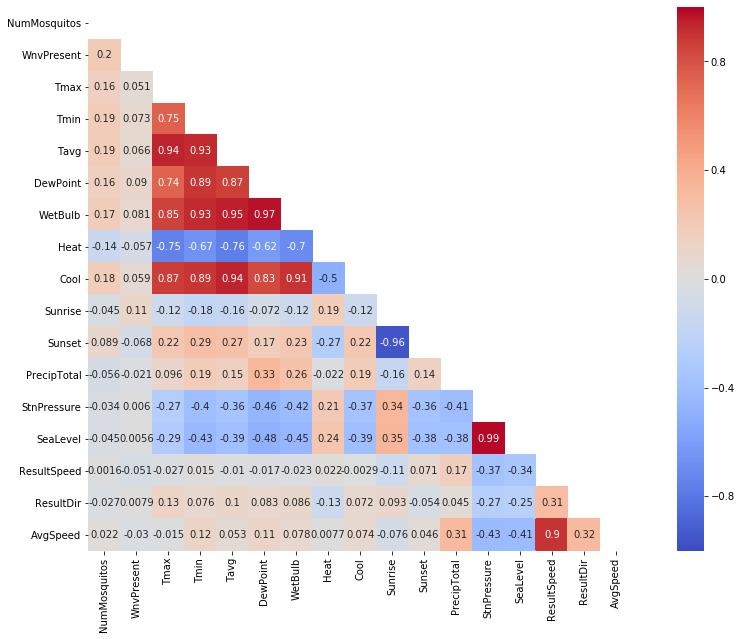

In [18]:
### plot
w_corr = w_features_df.corr()

### Visualize correlation using Heatmap
mask = np.zeros_like(w_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (16,10))

ax = sns.heatmap(w_corr, mask = mask, vmax=1, vmin=-1, cmap = 'coolwarm', square = True, annot=True)

## 2.3 Temperature

In [19]:
### Set the date column to be the index for time series data exploration
df_comb.set_index('Date', inplace = True)
df_comb.sort_index(inplace = True)

#### Temperature Versus number of WNV infection
- Known from train dataset's EDA, 2017 has the highest WNV infection followed by year 2013. 
- In year 2017, the peak (~ late Aug) in WNV infection rate happens where the temperature starting to rise again after the peak in early Aug.

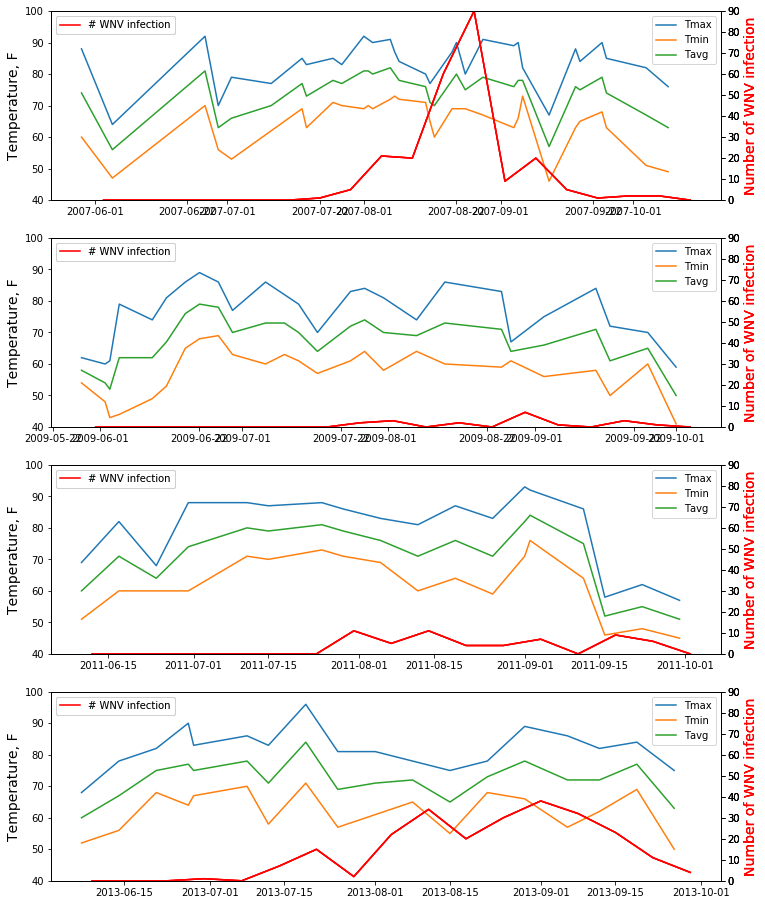

In [20]:
### Plot the Yearly Temperature versus WNV Infection (count the total number of WNV Present weekly)
fig, ax = plt.subplots(nrows = 4, figsize = (12,16))

temp = ['Tmax', 'Tmin', 'Tavg']
year = ['2007', '2009', '2011', '2013']

for i in range(4):
    for j in temp:
        ax[i].plot(df_comb[year[i]][[j]], label = j)
        ax2 = ax[i].twinx()
        ax2.plot(df_comb[year[i]].resample('W').sum()['WnvPresent'], color = 'r', label = '# WNV infection')
        ax[i].set_ylabel('Temperature, F', fontsize =14)
        ax2.set_ylabel('Number of WNV infection', color='r', fontsize=14)
        ax[i].set_ylim(40,100)
        ax2.set_ylim(0,90)
        ax[i].legend(loc=1);
        ax2.legend(loc=2);
        

#### Temperature Versus number of Number of Mosquitos (weekly sum)

- In year 2007, number of mosquitos peak in late July and late Aug (2 peaks). It somehow collide with higher temperature trend.
- As for remaining years, the number of mosquitos found to have significantly lesser compared to year 2017. The number of mosquitos peak happens earlier, around **July**, which is relatively hotter month with between June to Oct.


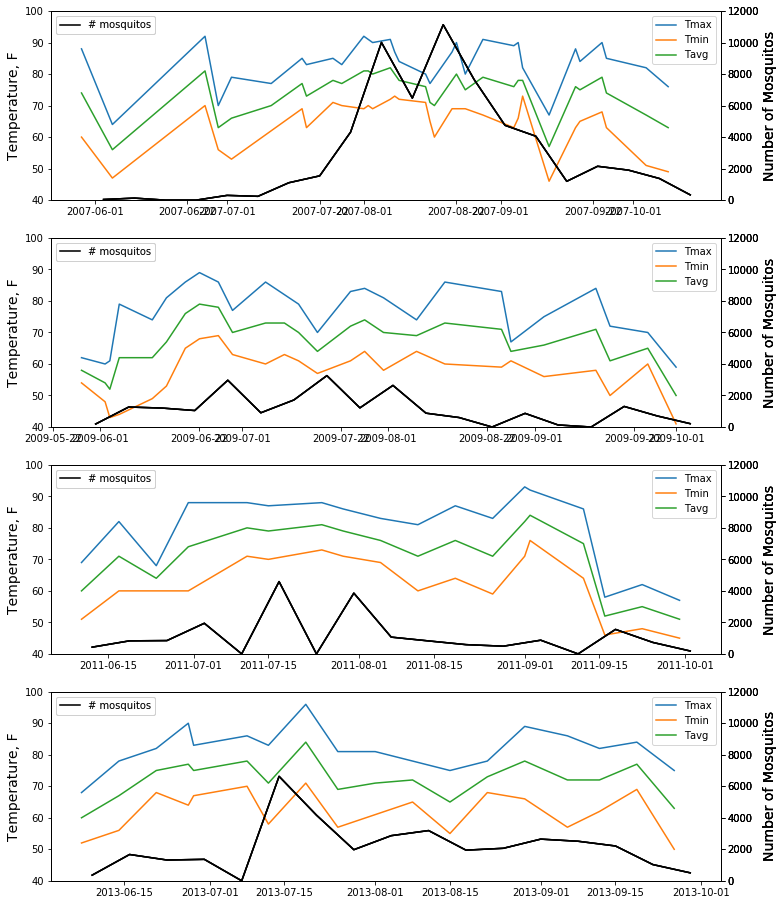

In [21]:
### Plot the Yearly Temperature versus Total Number of Mosquitos (weekly basis)
fig, ax = plt.subplots(nrows = 4, figsize = (12,16))

temp = ['Tmax', 'Tmin', 'Tavg']
year = ['2007', '2009', '2011', '2013']

for i in range(4):
    for j in temp:
        ax[i].plot(df_comb[year[i]][[j]], label = j)
        ax2 = ax[i].twinx()
        ax2.plot(df_comb[year[i]].resample('W').sum()['NumMosquitos'], color = 'k', label = '# mosquitos')
        ax[i].set_ylabel('Temperature, F', fontsize =14)
        ax2.set_ylabel('Number of Mosquitos', color='k', fontsize=14)
        ax[i].set_ylim(40,100)
        ax2.set_ylim(0,12000)
        ax[i].legend(loc=1);
        ax2.legend(loc=2);

## 2.4 Dew Point Temperature

#### Dew Point Temperature Versus number of WNV infection
- In year 2017, the dewpoint temperature is not the lowest within the time stint (June - Oct), where the WNV infection peak. 
- In year 2013, the WNV peak in Sept, which is somehow relatively lower dewpoint temperature month.

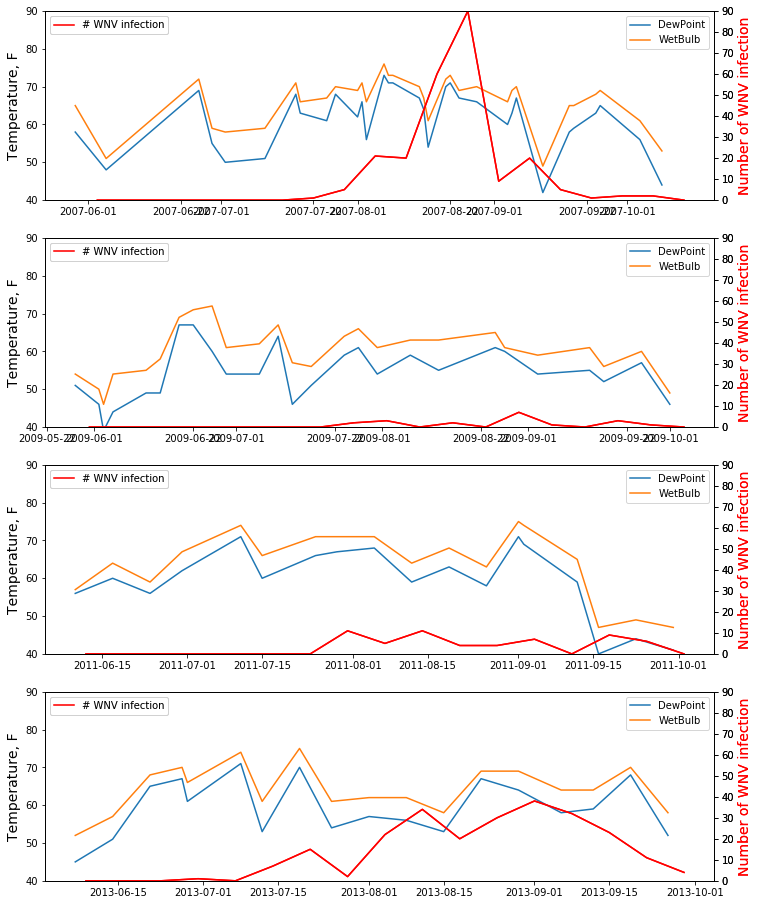

In [22]:
### Plot the Yearly DewPoint Temperature versus WNV Infection (count the total number of WNV Present weekly)
fig, ax = plt.subplots(nrows = 4, figsize = (12,16))

temp = ['DewPoint', 'WetBulb']
year = ['2007', '2009', '2011', '2013']

for i in range(4):
    for j in temp:
        ax[i].plot(df_comb[year[i]][[j]], label = j)
        ax2 = ax[i].twinx()
        ax2.plot(df_comb[year[i]].resample('W').sum()['WnvPresent'], color = 'r', label = '# WNV infection')
        ax[i].set_ylabel('Temperature, F', fontsize =14)
        ax2.set_ylabel('Number of WNV infection', color='r', fontsize=14)
        ax[i].set_ylim(40,90)
        ax2.set_ylim(0,90)
        ax[i].legend(loc=1);
        ax2.legend(loc=2);
        

#### DewPoint Temperature Versus number of Number of Mosquitos (weekly sum)

- In year 2007, number of mosquitos peak in late July and late Aug (2 peaks), where these are not the lower DewPoint temperature month for the same year.
- In year 2013, the number of mosquitos **peak in mid July**, which is saw a  **dip in the DewPoint temperature**.

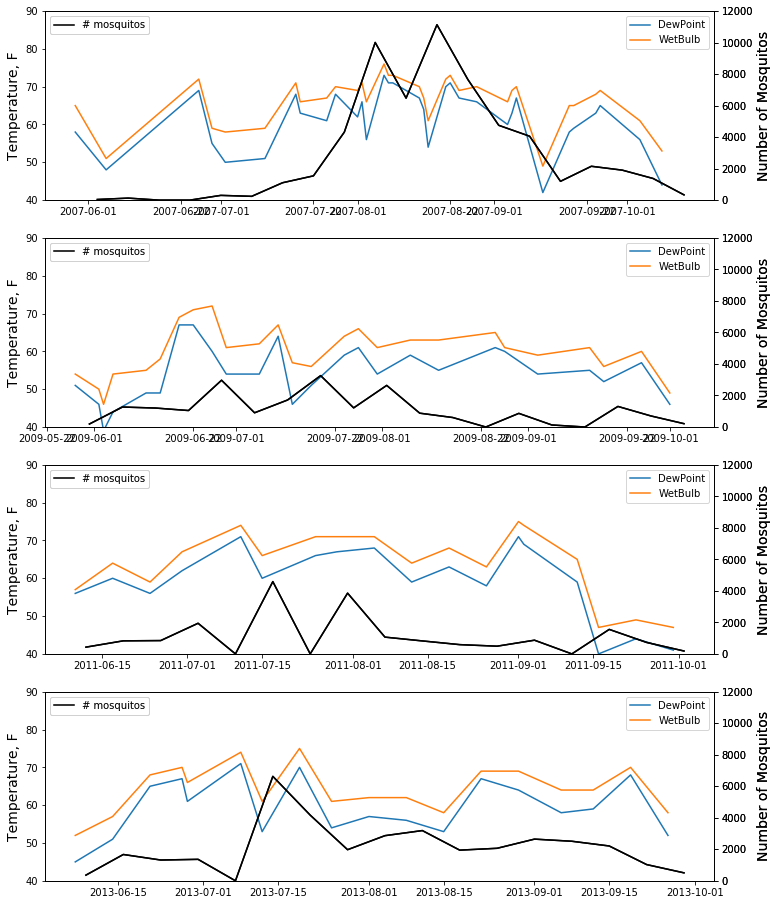

In [23]:
### Plot the Yearly Dew Point temperature versus total number of mosquitos (weekly basis)
fig, ax = plt.subplots(nrows = 4, figsize = (12,16))

temp = ['DewPoint', 'WetBulb']
year = ['2007', '2009', '2011', '2013']

for i in range(4):
    for j in temp:
        ax[i].plot(df_comb[year[i]][[j]], label = j)
        ax2 = ax[i].twinx()
        ax2.plot(df_comb[year[i]].resample('W').sum()['NumMosquitos'], color = 'k', label = '# mosquitos')
        ax[i].set_ylabel('Temperature, F', fontsize =14)
        ax2.set_ylabel('Number of Mosquitos', color='k', fontsize=14)
        ax[i].set_ylim(40,90)
        ax2.set_ylim(0,12000)
        ax[i].legend(loc=1);
        ax2.legend(loc=2);

## 2.5 Average Speed

#### Wind Speed Versus number of WNV infection
- In year 2017, the peak WNV infection happens in relatively lower wind speed month. Similarly for year 2013 as well.


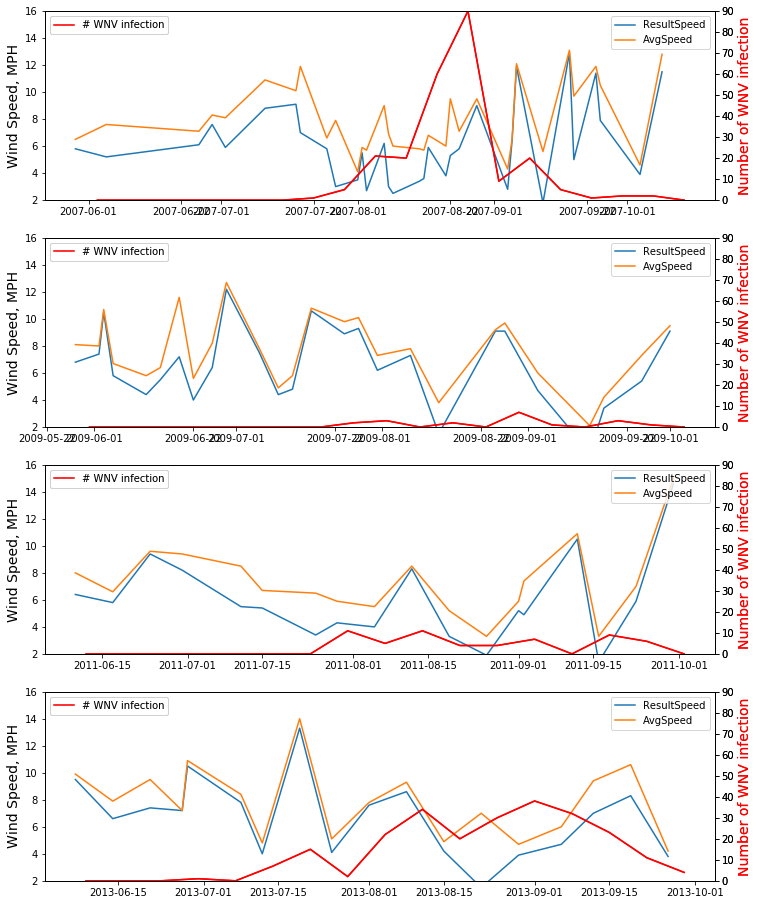

In [24]:
### Plot the Yearly DewPoint Temperature versus WNV Infection (count the total number of WNV Present weekly)
fig, ax = plt.subplots(nrows = 4, figsize = (12,16))

temp = ['ResultSpeed', 'AvgSpeed']
year = ['2007', '2009', '2011', '2013']

for i in range(4):
    for j in temp:
        ax[i].plot(df_comb[year[i]][[j]], label = j)
        ax2 = ax[i].twinx()
        ax2.plot(df_comb[year[i]].resample('W').sum()['WnvPresent'], color = 'r', label = '# WNV infection')
        ax[i].set_ylabel('Wind Speed, MPH', fontsize =14)
        ax2.set_ylabel('Number of WNV infection', color='r', fontsize=14)
        ax[i].set_ylim(2,16)
        ax2.set_ylim(0,90)
        ax[i].legend(loc=1);
        ax2.legend(loc=2);

#### Wind Speed Versus number of Number of Mosquitos (weekly sum)

- In year 2007, number of mosquitos peak at times where lower wind speed observed.
- However in year 2013, the number of mosquitos peak at times at higher wind speed.


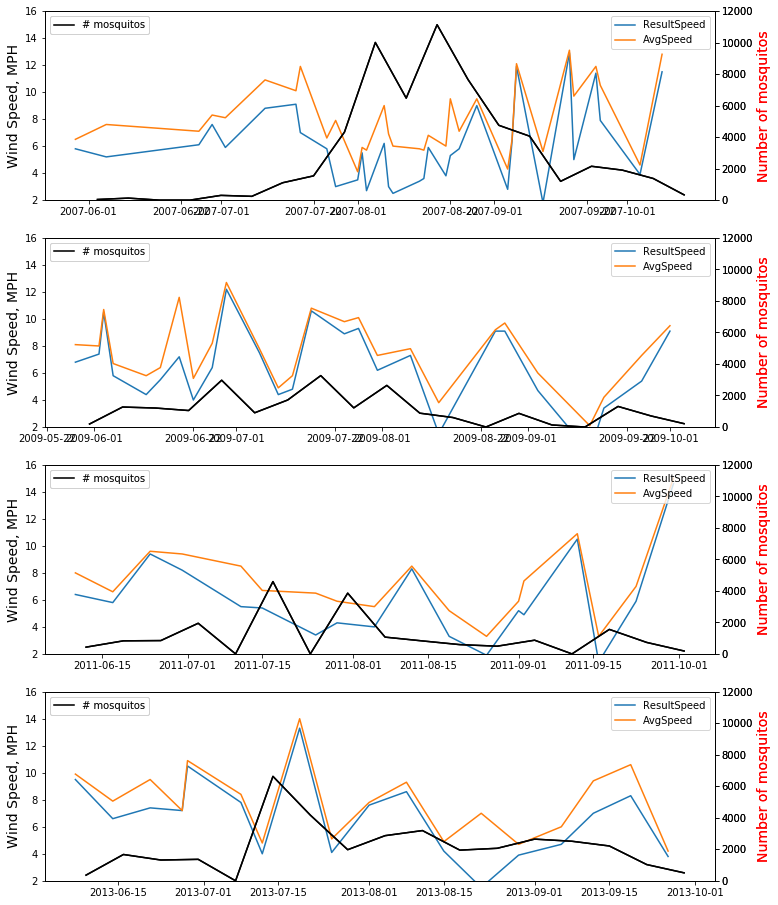

In [26]:
### Plot the Yearly Wind Speed versus WNV Infection (count the total number of WNV Present weekly)
fig, ax = plt.subplots(nrows = 4, figsize = (12,16))

temp = ['ResultSpeed', 'AvgSpeed']
year = ['2007', '2009', '2011', '2013']

for i in range(4):
    for j in temp:
        ax[i].plot(df_comb[year[i]][[j]], label = j)
        ax2 = ax[i].twinx()
        ax2.plot(df_comb[year[i]].resample('W').sum()['NumMosquitos'], color = 'k', label = '# mosquitos')
        ax[i].set_ylabel('Wind Speed, MPH', fontsize =14)
        ax2.set_ylabel('Number of mosquitos', color='r', fontsize=14)
        ax[i].set_ylim(2,16)
        ax2.set_ylim(0,12000)
        ax[i].legend(loc=1);
        ax2.legend(loc=2);

## 2.6 Total Rainfall (PrecipTotal)

#### Total Rainfall Versus number of WNV infection
- Both years 2017 and 2013, the peak WNV infection happens in relatively **lesser rainfall** timeframe.

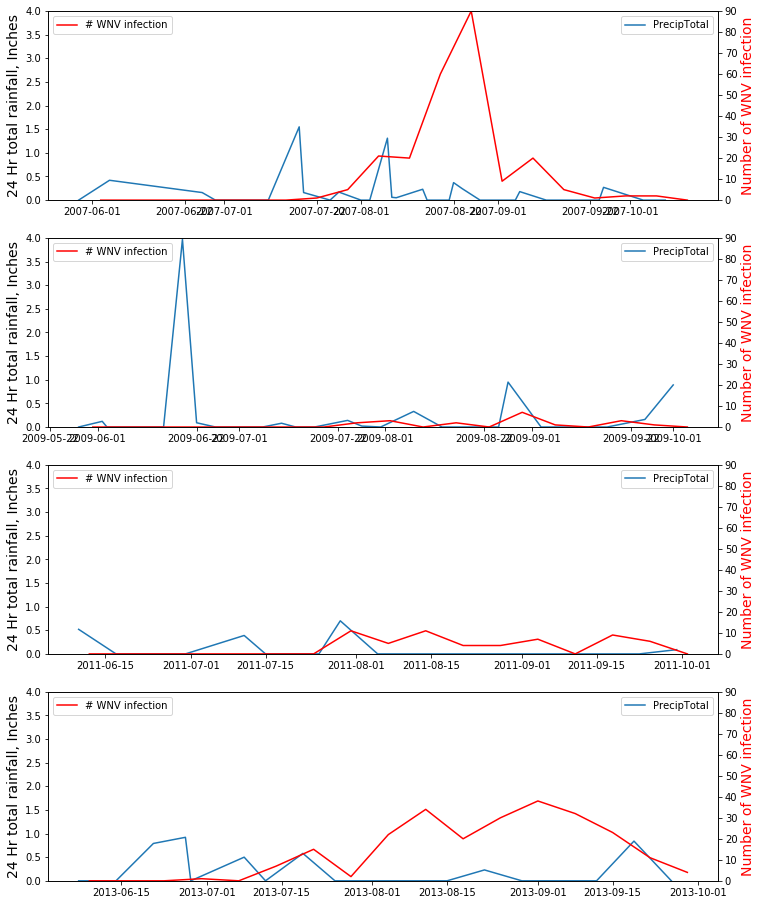

In [27]:
### Plot the Yearly Total Rainfall versus WNV Infection (count the total number of WNV Present weekly)
fig, ax = plt.subplots(nrows = 4, figsize = (12,16))

temp = ['PrecipTotal']
year = ['2007', '2009', '2011', '2013']

for i in range(4):
    for j in temp:
        ax[i].plot(df_comb[year[i]][[j]], label = j)
        ax2 = ax[i].twinx()
        ax2.plot(df_comb[year[i]].resample('W').sum()['WnvPresent'], color = 'r', label = '# WNV infection')
        ax[i].set_ylabel('24 Hr total rainfall, Inches', fontsize =14)
        ax2.set_ylabel('Number of WNV infection', color='r', fontsize=14)
        ax[i].set_ylim(0,4)
        ax2.set_ylim(0,90)
        ax[i].legend(loc=1);
        ax2.legend(loc=2);

#### Rainfall Versus number of Number of Mosquitos (weekly sum)

Both years 2017 and 2013, the peak of number of mosquitos happens in relatively lesser rainfall timeframe.

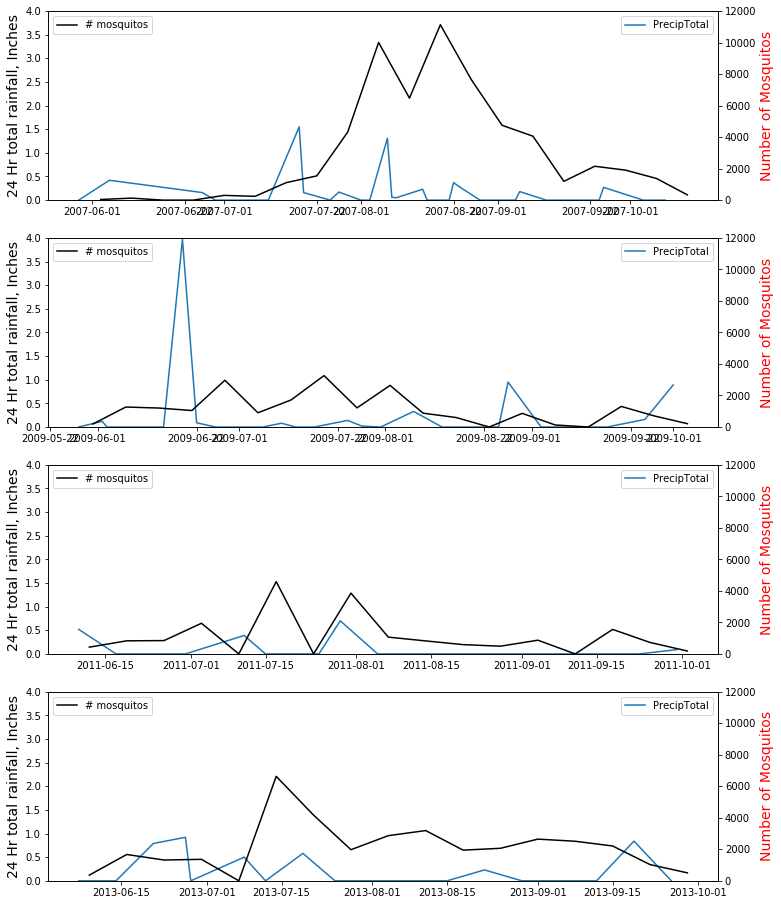

In [30]:
### Plot the Yearly Total Rainfall versus Number of mosquitos (count the total number of WNV Present weekly)
fig, ax = plt.subplots(nrows = 4, figsize = (12,16))

temp = ['PrecipTotal']
year = ['2007', '2009', '2011', '2013']

for i in range(4):
    for j in temp:
        ax[i].plot(df_comb[year[i]][[j]], label = j)
        ax2 = ax[i].twinx()
        ax2.plot(df_comb[year[i]].resample('W').sum()['NumMosquitos'], color = 'k', label = '# mosquitos')
        ax[i].set_ylabel('24 Hr total rainfall, Inches', fontsize =14)
        ax2.set_ylabel('Number of Mosquitos', color='r', fontsize=14)
        ax[i].set_ylim(0,4)
        ax2.set_ylim(0,12000)
        ax[i].legend(loc=1);
        ax2.legend(loc=2);


## 2.7 Average Wind Speed & Temparature

By comparing the Average Wind Speed and Temperature, trend of WNV infection found to be prompt to **lower wind speed** and **higher temperature** 

- Higher temperature (on the right of vertical black dashed line), more WNV infection (orange '+')
- Lower wind speed (below the horizontal black dashed line), more WNV infection.
- Hither temperature has more weights comparing to wind speed, as at higher temperature, both low and high wind speed quadrant in below graph have WNV infection.

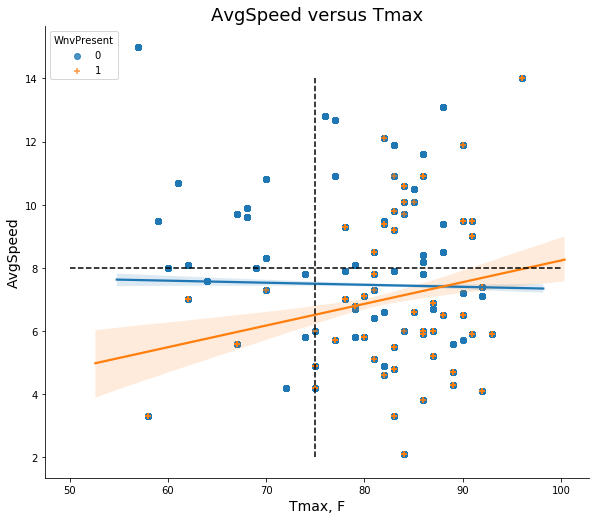

In [31]:
sns.lmplot('Tmax','AvgSpeed',data=df_comb,
           hue='WnvPresent',markers=['o','+'],legend_out=False, height=7, aspect=1.2,);

plt.xlabel('Tmax, F', fontsize=14)
plt.ylabel('AvgSpeed', fontsize =14)
plt.title('AvgSpeed versus Tmax', fontsize =18)

### plot to divide the graph into 4 quadrant
plt.plot((50,100), (8,8), '--', color = 'k')
plt.plot((75,75), (2,14), '--', color = 'k')

## 2.8 Total RainFall & Temparature

By comparing the Total Rainfall and Temperature, trend of WNV infection found to be prompt to **lower rain fall** and **higher temperature** 

- Higher temperature (on the right of vertical black dashed line), more WNV infection (orange '+')
- Lower rainfall (below the horizontal black dashed line), more WNV infection.


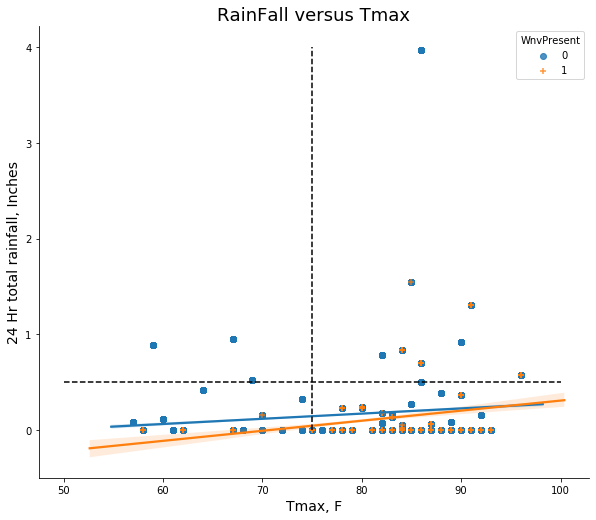

In [32]:
sns.lmplot('Tmax','PrecipTotal',data=df_comb,
           hue='WnvPresent',markers=['o','+'],legend_out=False, height=7, aspect=1.2,);

plt.xlabel('Tmax, F', fontsize=14)
plt.ylabel('24 Hr total rainfall, Inches', fontsize =14)
plt.title('RainFall versus Tmax', fontsize =18)

### plot to divide the graph into 4 quadrant
plt.plot((50,100), (0.5, 0.5), '--', color = 'k')  ##horizontal line
plt.plot((75,75), (0,4), '--', color = 'k')  ##vertical line